# [Animating Plots In Python Using MatplotLib [Python Tutorial]](https://youtu.be/bNbN9yoEOdU)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Approach we will use is generating a progressively large portion of the graph and generating a frame each time for the video.

So the first thing we need to do when creating the actual video is to create a writer object which is responsible  for collecting those frames and putting them together for the video. Here we will be using `PillowWriter`  object for this.

`PillowWriter` takes 2 arguments - __fps__ and __metadata__ containing different useful informations about the video itself. Depending on what file formats you are using you need to write different writer objects here.

`PillowWriter` is the most appropriate writer object for gifs and there is an `FFmpegWriter` object for mp4 files.

In the different frames, each figure will be generated using a list of data which will progressively get longer. In the code below, the list of data is stored in the __xlist__ and __ylist__. We will add a section of code in the `with` operator - this will indicate that we save all our results from the figure into the file - __sinwave.gif__. The 100 indicates the dpi of the file.

We will create the frames by generating a series of x-values and corresponding y-values and plotting them.

In [2]:
from matplotlib.animation import PillowWriter, FFMpegWriter

### Creating a sine wave gif

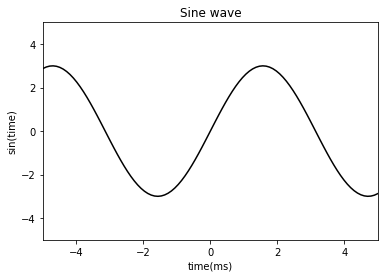

In [3]:
fig = plt.figure()  # created a figure
l, = plt.plot([],[], 'k-')    # empty line plot
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel("time(ms)")
plt.ylabel("sin(time)")
plt.title("Sine wave")

## we will manipulate the time plot to draw the shape we are interested in

def func(x):
    return(np.sin(x)*3)

metadata = dict(title = "Movie", artist = "Jeswin")
writer = PillowWriter(fps = 15, metadata=metadata)

xlist = []
ylist = []

with writer.saving(fig, "sinwave.gif", dpi = 100):
    for xval in np.linspace(-5,5,100):
        xlist.append(xval)
        ylist.append(func(xval))

        l.set_data(xlist, ylist)
        writer.grab_frame()

Resultant gif file will be saved in the working directory.

### Creating an animation video(mp4) of sine wave

[FFMpeg can be downloaded here](https://www.ffmpeg.org/download.html)

![](images/1.png)

The above file was not working so using this from the [github link](https://github.com/GyanD/codexffmpeg/releases/tag/6.0).

![](images/2.png)

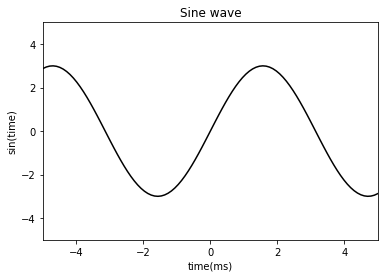

In [8]:
from matplotlib.animation import PillowWriter, FFMpegWriter

# give location to ffmpeg exe file
plt.rcParams["animation.ffmpeg_path"] = "E:\\softwares\\ffmpeg-6.0-essentials_build\\ffmpeg-6.0-essentials_build\\bin\\ffmpeg.exe"

fig = plt.figure()  # created a figure
l, = plt.plot([],[], 'k-')    # empty line plot
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel("time(ms)")
plt.ylabel("sin(time)")
plt.title("Sine wave")

## we will manipulate the time plot to draw the shape we are interested in

def func(x):
    return(np.sin(x)*3)

metadata = dict(title = "Movie", artist = "Jeswin")
writer = FFMpegWriter(fps = 15, metadata=metadata)

xlist = []
ylist = []

with writer.saving(fig, "sinwave.mp4", dpi = 100):
    for xval in np.linspace(-5,5,100):
        xlist.append(xval)
        ylist.append(func(xval))

        l.set_data(xlist, ylist)
        writer.grab_frame()

In [9]:
type(l)

matplotlib.lines.Line2D